# PROJECT PART ONE - CLASSIFICATION PROBLEM

## Imports

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

## Creating Dataframes

In [8]:
#Converting All Text Files To Dataframes (Training Data, Test Data, And Training Label Data)
def transformToDataframes(TextData):
    dataset = pd.read_csv(TextData, sep='\t', header=None, engine='python')
    #Mark Missing Values With Null Placeholder
    dataset.replace(1e+99, np.nan, inplace=True)
    print(TextData[15:], ": ", dataset.shape)
    return dataset

#Training Data
TrainingData1 = transformToDataframes('./Project Data/TrainData1.txt')
TrainingData2 = transformToDataframes('./Project Data/TrainData4.txt') 
TrainingData3 = transformToDataframes('./Project Data/TrainData5.txt')

#Test Data
TestData1 = transformToDataframes('./Project Data/TestData1.txt')
TestData2 = transformToDataframes('./Project Data/TestData4.txt') 
TestData3 = transformToDataframes('./Project Data/TestData5.txt') 

#Training Labels
TrainingLabel1 = transformToDataframes('./Project Data/TrainLabel1.txt')
TrainingLabel2 = transformToDataframes('./Project Data/TrainLabel4.txt')
TrainingLabel3 = transformToDataframes('./Project Data/TrainLabel5.txt')

TrainData1.txt :  (150, 3312)
TrainData4.txt :  (2547, 1)
TrainData5.txt :  (1119, 1)
TestData1.txt :  (53, 3312)
TestData4.txt :  (1092, 1)
TestData5.txt :  (480, 1)
TrainLabel1.txt :  (150, 1)
TrainLabel4.txt :  (2547, 1)
TrainLabel5.txt :  (1119, 1)


## Pre-Processing

### Missing Value Estimation / Imputation

Missing values before imputation: 9936


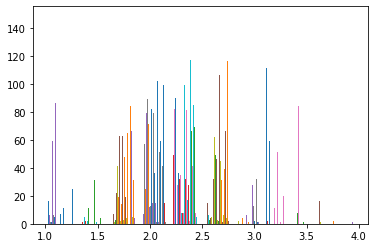

Missing values after imputation: 0


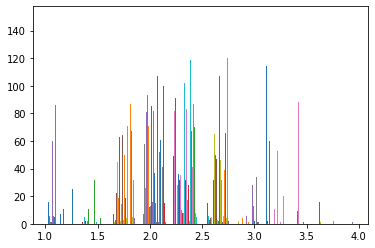

In [10]:
#Visualizing the distribution of Training Data One
print("Missing values before imputation:", TrainingData1.isnull().sum().sum())
plt.hist(TrainingData1, bins=10)
plt.show()

#Applying KNN Euclidean Imputation Of Missing Values To Dataset
knnImpute = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', add_indicator=False)
TrainingData1 = pd.DataFrame(knnImpute.fit_transform(TrainingData1), columns = TrainingData1.columns)

#Visualizing Distribution After Imputation
print("Missing values after imputation:", TrainingData1.isnull().sum().sum())
plt.hist(TrainingData1, bins=10)
plt.show()

## CLASSIFICATION TRAINING, TESTING, AND EVALUATION

In [11]:
#Applying The Class Training Labels To Datasets
TrainingData1['class'] = TrainingLabel1
TrainingData2['class'] = TrainingLabel2 #Not properly loaded yet
TrainingData3['class'] = TrainingLabel3

#### K NEAREST NEIGHBOR CLASSIFIER

In [12]:
#Classifier Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y = TrainingData1['class']
X = TrainingData1.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(1, 21): 
    knn_clf = KNeighborsClassifier(n_neighbors = k) 
    knn_clf.fit(X_train, y_train) 

    y_pred = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    print('K=', k, ', Accuracy: ', accuracy, ', Precision: ', precision, ', Recall: ', recall)
    print()

K= 1 , Accuracy:  0.9 , Precision:  0.9 , Recall:  0.9

K= 2 , Accuracy:  0.8666666666666667 , Precision:  0.8666666666666667 , Recall:  0.8666666666666667

K= 3 , Accuracy:  0.9 , Precision:  0.9 , Recall:  0.9

K= 4 , Accuracy:  0.9 , Precision:  0.9 , Recall:  0.9

K= 5 , Accuracy:  0.9 , Precision:  0.9 , Recall:  0.9

K= 6 , Accuracy:  0.8666666666666667 , Precision:  0.8666666666666667 , Recall:  0.8666666666666667

K= 7 , Accuracy:  0.9 , Precision:  0.9 , Recall:  0.9

K= 8 , Accuracy:  0.8666666666666667 , Precision:  0.8666666666666667 , Recall:  0.8666666666666667

K= 9 , Accuracy:  0.9 , Precision:  0.9 , Recall:  0.9

K= 10 , Accuracy:  0.8666666666666667 , Precision:  0.8666666666666667 , Recall:  0.8666666666666667

K= 11 , Accuracy:  0.8666666666666667 , Precision:  0.8666666666666667 , Recall:  0.8666666666666667

K= 12 , Accuracy:  0.8 , Precision:  0.8 , Recall:  0.8

K= 13 , Accuracy:  0.8 , Precision:  0.8 , Recall:  0.8

K= 14 , Accuracy:  0.8 , Precision:  0.8 , 

#### SUPPORT VECTOR MACHINE

#### LOGISTIC REGRESSION CLASSIFIER

#### RANDOM FOREST CLASSIFIER